# Classification linéaire

## Le Perceptron

Durant ce travail pratique, vous allez implémenter un algorithme de classification linéaire bien connu: le perceptron. L'équation de base du perceptron est la suivante:

$$f(x) = h(\pmb{w}^T x + b)$$ 

où 

$$ 
 h(a) = \left\{ 
  \begin{array}{l l}
    ~1 & \quad \text{si} ~ a > 0\\
    -1 & \quad \text{sinon}
  \end{array} \right. $$

et $x$ est un exemple à prédire, $\pmb{w}$ est un vecteur de poids et $b$ est un biais. $\pmb{w}$ et $b$ sont les paramètres que nous allons devoir apprendre.

## Apprentissage des paramètres pour le perceptron

*Dans cette partie vous allez calculer les formules de mise à jour des paramètres $\pmb{w}$ et $b$*

### Fonction objectif

L'algorithme d'apprentissage du perceptron correspond à une descente de gradient sur l’objectif suivant:
$$J_{perceptron}(\theta) = \frac{1}{n} \sum_{i=1}^n I_{\{(\pmb{w}^T x^{(i)} + b)t^{(i)} < 0\}}(-(\pmb{w}^T x^{(i)} + b)t^{(i)})$$

En fait cet objectif va juste compter le nombre d'exemple qui sont mal classifiés pour des paramètres $\pmb{w}$ et $b$ donnés. Si on réduit la valeur de la fonction objectif, alors on réduit le nombre d'exemple mal classifiés, donc on obtient un meilleur classifieur.

### Descente de gradient stochastique

Pour obtenir l'algorithme d'apprentissage pour le perceptron, on va utiliser la méthode de descente de gradient stochastique, c'est à dire qu'on va mettre à jour les poids de manière à ce qu'à chaque itération, on réduise l'objectif calculé sur **un** exemple, en suivant la direction donnée par l'opposé du gradient.

À vous de jouer:

1. Exprimez la fonction objectif pour un seul exemple
2. Exprimez les dérivées partielles $\frac{\partial J^{(i)}}{\partial b} et \frac{\partial J^{(i)}}{\partial \pmb{w}}$

Aide: séparer les cas $(\pmb{w}^T x^{(i)} + b)t^{(i)} < 0$ et $(\pmb{w}^T x^{(i)} + b)t^{(i)} \geq 0$

La fonction objectif pour l'exemple $i$ est:
$$J^{(i)} = I_{\{(\pmb{w}^T x^{(i)} + b)t^{(i)} < 0\}}(-(\pmb{w}^T x^{(i)} + b)t^{(i)})$$

Exprimons les dérivées partielles, dans le cas où $(\pmb{w}^T x^{(i)} + b)t^{(i)} < 0$, on obtient:
$$\frac{\partial J^{(i)}}{\partial b} = -t^{(i)}$$
$$\frac{\partial J^{(i)}}{\partial \pmb{w}} = -x^{(i)} t^{(i)}$$
Dans l'autre cas ($(\pmb{w}^T x^{(i)} + b)t^{(i)} \geq 0$), les deux dérivées partielles sont nulles car $J^{(i)}$ est constant ($J^{(i)} = 0$)

### Algorithme d'entrainement

L'algorithme d'apprentissage est donc:

 - boucler sur les exemples un par un
 - pour chaque exemple mettre à jour les poids en utilisant : $b \leftarrow b - \eta \frac{\partial J^{(i)}}{\partial b}$ et $\pmb{w} \leftarrow \pmb{w} - \eta \frac{\partial J^{(i)}}{\partial \pmb{w}}$

On peut ajouter une condition d'arrêt :

 - si tous les exemples d'entrainement sont bien classés on s'arrête. Dans ce cas $J_{perceptron}(\theta) = 0$ et les dérivées partielles sont nulles, donc on n'apprend plus rien.

## Travail Pratique

*Dans cette partie vous allez implémenter les formules obtenues ci-dessus*

### Préparation des données

Dans ce travail pratique on va travailler sur le dataset iris. On va utiliser seulement 2 classes: les iris avec les étiquettes 1 et 2, que l'on va transformer en 1 et -1 pour les besoins du perceptron. On va également utiliser uniquement 2 traits par iris, afin de pouvoir visualiser l'algorithme.

Voici le code qui prépare les données. N'hésitez pas à regarder les *shapes* des différents sets pour voir comment les données sont préparées!

In [85]:
%pylab inline
import numpy as np

#On commence par charger iris
iris = np.loadtxt('iris.txt')
data = iris

# On se limite au cas de la classification BINAIRE donc on va seulement garder 
# données des 2 premières classes.
# Ici on garde juste les exemples avec l'etiquette 1 et 2.
data = data[data[:,-1]<3,:]
# Ici on transforme chaque etiquette qui est egale a 2 en -1, pour avoir les 
# mêmes étiquettes que dans la formulation standard du perceptron (1 et -1).
data[data[:,-1]==2,-1] = -1

# On se limite à des données dont la dimension est 2, de façon à pouvoir visualiser
# la frontière de decision avec la fonction gridplot.
train_cols = [2,3]
# Une variable pour contenir l'indice de la colonne correspondant aux étiquettes.
target_ind = [data.shape[1] - 1]

# Nombre de classes
n_classes = 2
# Nombre de points d'entrainement
n_train = 75

# Commenter pour avoir des resultats non-deterministes 
np.random.seed(2)

# Déterminer au hasard des indices pour les exemples d'entrainement et de test
inds = range(data.shape[0])
np.random.shuffle(inds)
train_inds = inds[:n_train]
test_inds = inds[n_train:]
    
# Séparer les donnees dans les deux ensembles: entrainement et test.
train_set = data[train_inds,:]  # garder les bonnes lignes
train_set = train_set[:,train_cols + target_ind]  # garder les bonnes colonnes
test_set = data[test_inds,:]
test_set = test_set[:,train_cols + target_ind]

# Sépararer l'ensemble de test: entrées et étiquettes.
test_inputs = test_set[:,:-1]
test_labels = test_set[:,-1]

# Le taux d'apprentissage
mu = 0.1

Populating the interactive namespace from numpy and matplotlib


###La classe Perceptron###

On introduit la classe *Perceptron*. Comme d'habitude, c'est un algorithme qui possède une fonction *train* pour entraîner l'algorithme à partir du *train_set* et une fonction *compute_prediction*, qui prédit les classes de chaque exemple de *test_inputs*.

Pour ce travail pratique vous devez:

1. Compléter la fonction *train* de la classe *Perceptron*.
2. Compléter la fonction *compute_prediction* de la classe *Perceptron*.


In [86]:
class Perceptron:

    def __init__(self, mu):
        """
        Constructeur de la classe. Prend les paramètres données à la
        constuction de la classe et initialise ses attribues.

        Parameters
        ----------
        mu : float
            Taux d'apprentissage
        """
        self.mu = mu

    def plot_function(self, train_data, title):
        plt.figure()
        d1 = train_data[train_data[:, -1] > 0]
        d2 = train_data[train_data[:, -1] < 0]
        plt.scatter(d1[:, 0], d1[:, 1], c='b', label='classe +1')
        plt.scatter(d2[:, 0], d2[:, 1], c='g', label='classe -1')
        x = np.linspace(-10, 10, 100)
        y = -(self.weights[0]*x + self.bias)/self.weights[1]
        plt.plot(x, y, c='r', lw=2, label='y = -(w1*x + b1)/w2')
        plt.xlim(np.min(train_data[:, 0]) - 0.5, np.max(train_data[:, 0]) + 0.5)
        plt.ylim(np.min(train_data[:, 1]) - 0.5, np.max(train_data[:, 1]) + 0.5)
        plt.grid()
        plt.legend(loc='lower right')
        plt.title(title)
        plt.show()

    def train(self, train_data, max_iter=10):
        """
        Entraine le modèle d'apprentissage à partir d'une matrice de données,
        en faisant un maximum de max_iter sur le set d'entraînement.
        
        Parameters
        ----------
        train_data : array
            matrice de dimension (n,d+1) où n est le nombre d'exemples et 
            d le nombre de dimensions. L'index d+1 de change ligne représente
            la classe de l'exemple de cette ligne.
        max_iter : int
            Nombre maximum d'itérations sur le set d'entrainement (défaut 10).
        """
        # 1) Initialisation des paramètres. 
        # Initialisez les poids à de petites valeurs et le biais à 0.
        self.weights = np.random.randn(train_data.shape[1]-1) 
        self.bias = 0
         
        # 2) Entrainement
        # Implémentez l'algorithme présenté ci-dessus.
        # iterations est le nombre d'itérations effectuées sur le set d'entraînement
        # count est le nombre d'éléments mal classés.
        print 'Entraînement ...'
        iteration = 0
        while iteration < max_iter:
            self.plot_function(train_data, 'Iteration no: ' + str(iteration))
            count = 0
            for i in xrange(train_data.shape[0]):
                # implémentez le test d'erreur de classification
                # et implémentez la mise à jour des poids
                # sans oublier d'incrémenter les compteurs count et époque
                # afin que l'entraînement termine un jour!
                if (np.dot(self.weights, train_data[i][:-1]) + self.bias) * train_data[i][-1] < 0:
                    self.weights += self.mu * train_data[i][:-1] * train_data[i][-1]
                    self.bias += self.mu * train_data[i][-1]
                    count += 1
            if count == 0:
                break
            iteration += 1
        print 'Entraînement terminé!'
        print "L'erreur d'entraînement est de ", float(count)/train_data.shape[0], "%."

    def compute_predictions(self, test_data):
        """
        Calcule les prédictions à partir d'une matrice de test. Donne en
        sortie une prédictions pour chaque classe.
        
        Parameters
        ----------
        test_data : array
            matrice de dimension (n,d) où n est le nombre d'exemples et
            d le nombre de dimensions
            
        Returns
        -------
        array
            tableau de dimension (n) où n est le nombre d'exemples de test.
        """
        
        # A COMPLÉTER!
        # Cette fonction doit utiliser les paramètres appris pour calculer
        # la valeur de sortie pour les exemples de test_data (un exemple
        # par ligne, seulement les traits).
  
        # 1) Vous devez calculer la vraie valeur de sorties.
        predictions = np.zeros(test_data.shape[0])
        for i in xrange(test_data.shape[0]):
            predictions[i] = np.dot(self.weights, test_data[i]) + self.bias 
        return predictions


###Entraînement du modèle###

Maintenant que la classe *Perceptron* est complétée, on peut l'entraîner. Un graphe va s'afficher pour chaque itération effectuées sur le set d'entraînement.

Entraînement ...


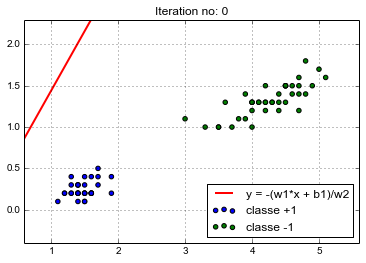

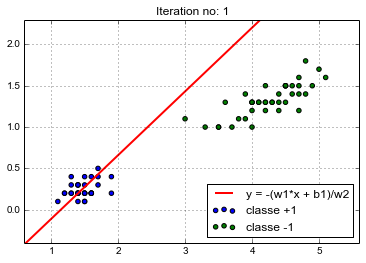

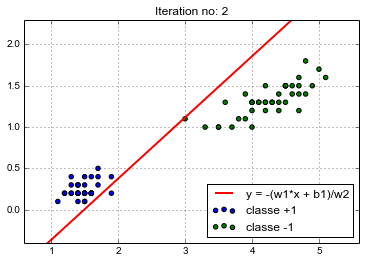

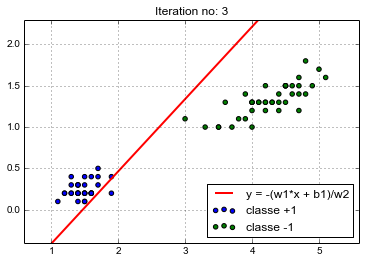

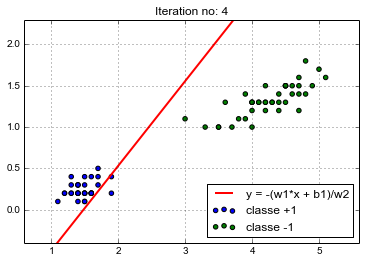

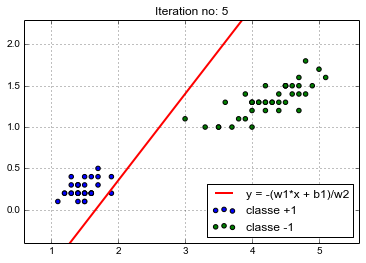

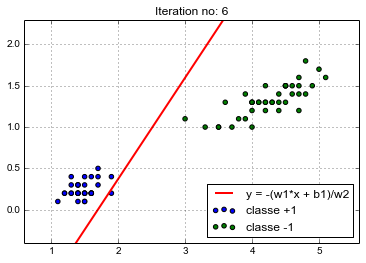

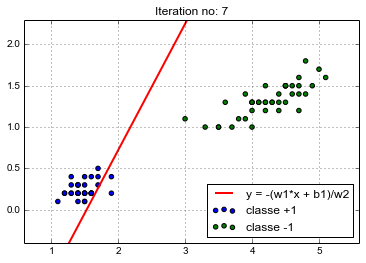

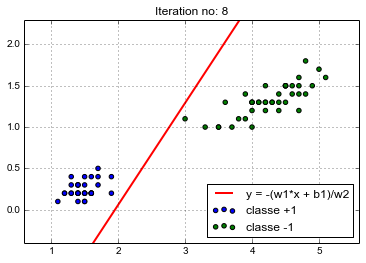

Entraînement terminé!
L'erreur d'entraînement est de  0.0 %.


In [87]:
# Créer et entrainer le modele
model_perceptron = Perceptron(mu)
model_perceptron.train(train_set)





###Test du modèle###

Maintenant que le modèle est entraîné, on peut le tester!

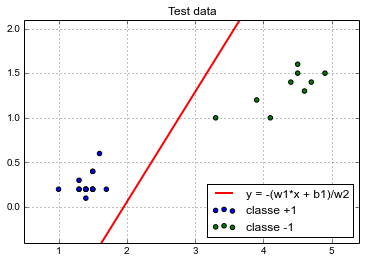

L'eureur de test est de  0.0 %


In [88]:
# Obtenir les classes prédites sur l'ensemble de test
predictions = model_perceptron.compute_predictions(test_inputs)

# Convertir les sorties en classe. On prend le signe.
classes_pred = np.sign(predictions)
   
# Mesurer la performance.
err = 1.0 - np.mean(test_labels==classes_pred)

model_perceptron.plot_function(test_set, 'Test data')
print "L'eureur de test est de ", 100.0 * err,"%"

###Si vous avez terminé...###

Si vous avez terminé, vous pouvez essayer de varier les différents paramètres, par exemple:

1. Varier $mu$. Quel est son impact sur le temps d'entraînement? Et sur les performances?
2. Utiliser d'autres traits des iris (par exemple [1,3] à la place de [2,3]).
3. Varier la taille du set d'entraînement. Y a-t-il un impact sur les performances?